# Predict Housing Value using various attributes after EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

df = pd.read_csv('housing.csv')


## Descriptive Analytics (EDA)

To help us understand the data, we look at the various attributes for the data

In [2]:
# Get the breakdown of the houses and the proximity to ocean
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

[]

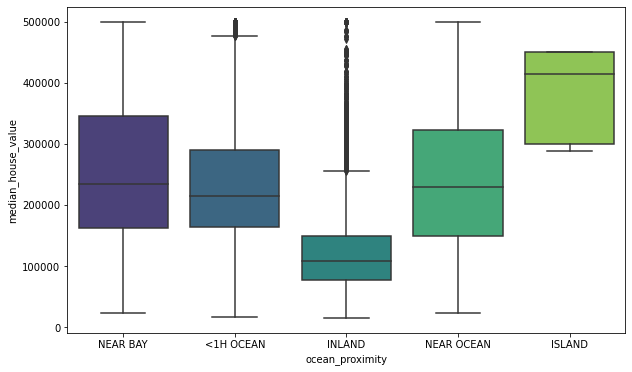

In [3]:
# Box plot for proximity on housing value
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='ocean_proximity',y='median_house_value',palette='viridis')
plt.plot()

In [4]:
# Find the number of null values in each column
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
# Look at % of entries with null values
"{:.0%}".format(len(df[df.total_bedrooms.isnull()]) / len(df))

'1%'

In [6]:
# Drop the null values
df_drop = df.dropna()
df_drop

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [7]:
df_drop.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [8]:
# Descriptive stats for the data
df_drop.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


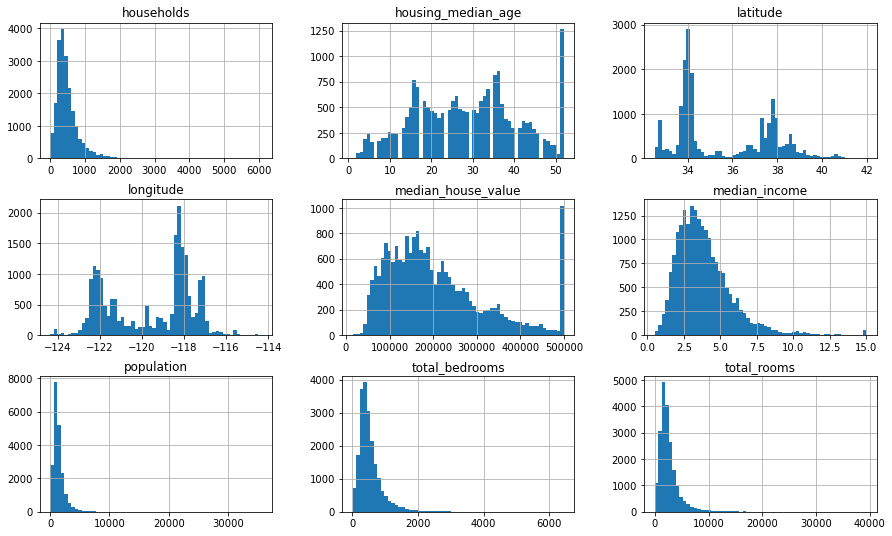

In [9]:
# Histogram for the variables
df_drop.hist(bins=60, figsize=(15,9))
plt.show()

From the above histogram, we noted outlier in the housing_median_age and median_housing_value, which we will drop them below.

In [10]:
# Drop outlier
df_drop2 = df_drop.loc[df['median_house_value'] < 500001]
df_drop2 = df_drop2.loc[df['housing_median_age'] < 52]

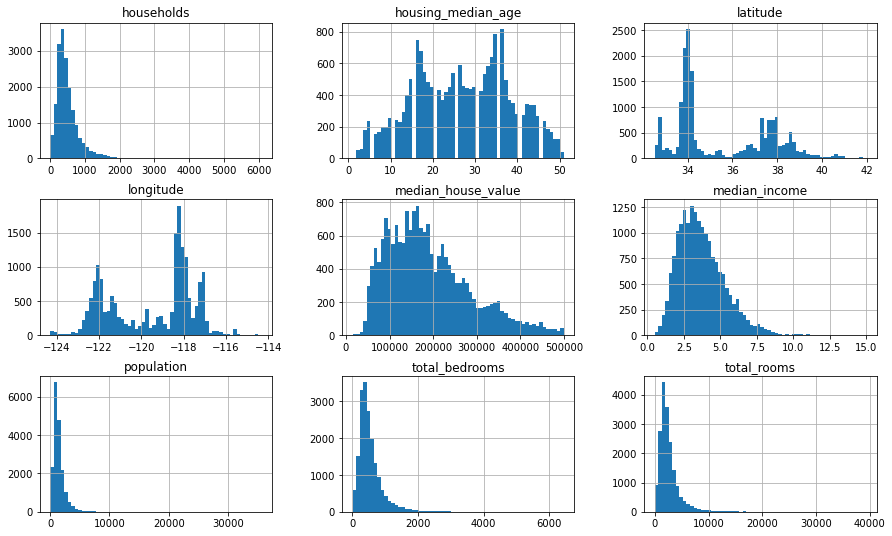

In [11]:
# Histogram for the variables
df_drop2.hist(bins=60, figsize=(15,9))
plt.show()

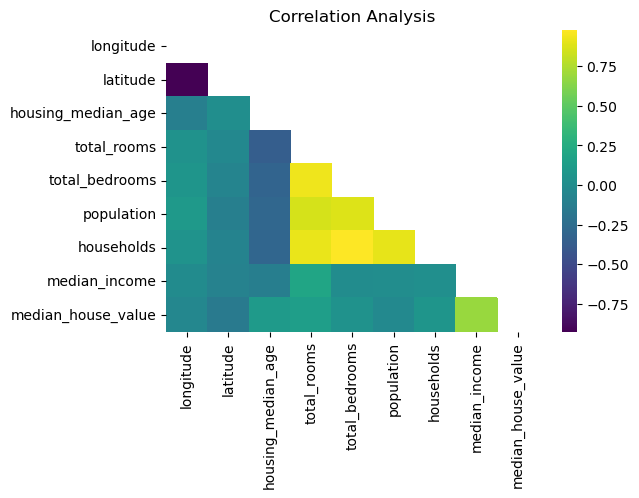

In [12]:
corr = df_drop.corr()
mask = np.triu(np.ones_like(corr,dtype=bool))

plt.figure(dpi=100)
plt.title('Correlation Analysis')
sns.heatmap(corr, mask=mask, annot=False, lw=0, linecolor='white', cmap='viridis', fmt='0.2f')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

We noted above that the median income have the highest correlation with the house value. Thus, we will look at applying linear regression with median_house_value as the target variable and the median_income as the predictor variable.

## Feature Engineering

Some of the attributes we can create are population per bedroom which gives us an idea of which area have more more people to a bedroom. Population per household also give us a different perspective on the density of household.

In [13]:
df_add = df_drop2
df_add["population_per_bedroom"] = df_add['population']/df_add['total_bedrooms']
df_add["population_per_household"] = df_add["population"]/df_add["households"]
df_add

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,population_per_bedroom,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,2.496124,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,2.170886,2.109842
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,1.813534,2.026891
15,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,NEAR BAY,2.462898,2.640152
18,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,NEAR BAY,2.175824,2.362768
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2.259358,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2.373333,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2.076289,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,1.811736,2.123209


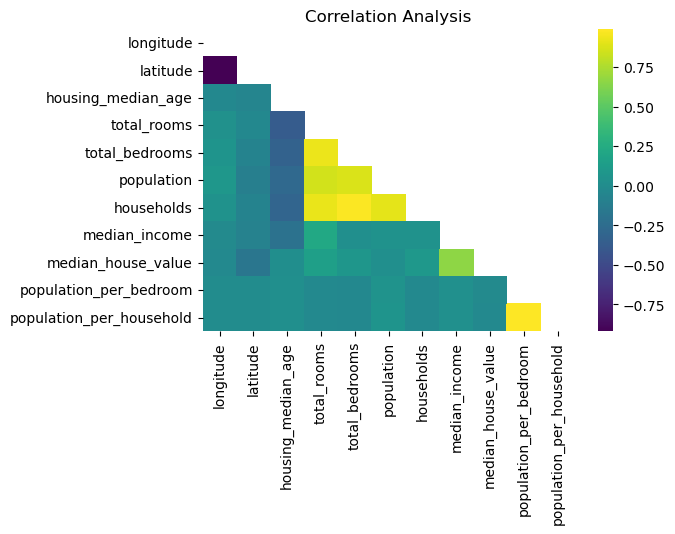

In [14]:
corr = df_add.corr()
mask = np.triu(np.ones_like(corr,dtype=bool))

plt.figure(dpi=100)
plt.title('Correlation Analysis')
sns.heatmap(corr, mask=mask, annot=False, lw=0, linecolor='white', cmap='viridis', fmt='0.2f')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [15]:
corr=corr.median_house_value.sort_values(ascending=False)
d= pd.DataFrame({'Column':corr.index,
                 'Correlation with median_house_value':corr.values})
d

,Column,Correlation with median_house_value
0,median_house_value,1.000000
1,median_income,0.661027
2,total_rooms,0.151571
3,households,0.099076
4,total_bedrooms,0.079721
5,population,0.020692
6,housing_median_age,0.015306
7,population_per_bedroom,-0.015640
8,population_per_household,-0.020283
9,longitude,-0.021329


## One-Hot Encode the categorical variable ocean_proximity

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_add_cat = df_add['ocean_proximity']
df_add_cat_encoded = encoder.fit_transform(df_add_cat)
df_add_cat_encoded

array([3, 3, 3, ..., 1, 1, 1])

In [17]:
col_list = encoder.classes_

In [18]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
df_add_cat_1hot = encoder.fit_transform(df_add_cat_encoded.reshape(-1,1))
df_add_cat_1hot

<18379x5 sparse matrix of type '<class 'numpy.float64'>'
	with 18379 stored elements in Compressed Sparse Row format>

In [19]:
df_add_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [20]:
df_add_cat_1hot = pd.DataFrame(df_add_cat_1hot.toarray(),columns = col_list)
df_add_cat_1hot

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
18374,0.0,1.0,0.0,0.0,0.0
18375,0.0,1.0,0.0,0.0,0.0
18376,0.0,1.0,0.0,0.0,0.0
18377,0.0,1.0,0.0,0.0,0.0


In [21]:
df_add = pd.concat([df_add, df_add_cat_1hot.set_index(df_add.index)], axis=1)

In [22]:
df_add

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,population_per_bedroom,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,2.496124,2.555556,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,2.170886,2.109842,0.0,0.0,0.0,1.0,0.0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,1.813534,2.026891,0.0,0.0,0.0,1.0,0.0
15,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,NEAR BAY,2.462898,2.640152,0.0,0.0,0.0,1.0,0.0
18,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,NEAR BAY,2.175824,2.362768,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2.259358,2.560606,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2.373333,3.122807,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2.076289,2.325635,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,1.811736,2.123209,0.0,1.0,0.0,0.0,0.0


In [23]:
corr2 = df_add.corr()
corr2=corr2.median_house_value.sort_values(ascending=False)
d= pd.DataFrame({'Column':corr2.index,
                 'Correlation with median_house_value':corr2.values})
d

,Column,Correlation with median_house_value
0,median_house_value,1.000000
1,median_income,0.661027
2,<1H OCEAN,0.317285
3,total_rooms,0.151571
4,NEAR OCEAN,0.147096
5,NEAR BAY,0.110568
6,households,0.099076
7,total_bedrooms,0.079721
8,population,0.020692
9,ISLAND,0.019521


## Building Model (Linear Regression)

Split the data in train and test set
To predict the house value based on the attributes

In [24]:
X = df_add['median_income'].values.reshape(-1,1)
y = df_add['median_house_value'].values.reshape(-1,1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = regressor.predict(X_test)

In [28]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/df_add['median_house_value'].mean())

Mean Absolute Error: 54503.197023195156
Mean Squared Error: 5084167139.7859535
Root Mean Squared Error 71303.34592279632
0.3761449729414916


Root Mean Square Error is a metric that tells us the average distance between the predicted values from the model and actual values. The lower the better

However, as the RMSE is 37% of the mean value of median_house_value, the algorithm is not very accurate.

## Building Model (Multiple Linear Regression)

As the simple linear regression model is not doing a good job of predicting the housing value, let us look at having multiple attributes to predict the housing value.

In [40]:
X2 = df_add.drop(['median_house_value','ocean_proximity'], axis=1).values
y2 = df_add['median_house_value'].values

In [30]:
#plt.figure(figsize=(15,10))
#plt.tight_layout()
#sns.distplot(df_add['median_house_value'])

In [41]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

In [42]:
regressor = LinearRegression()
regressor.fit(X2_train, y2_train)

LinearRegression()

In [43]:
y2_pred = regressor.predict(X2_test)

In [44]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, y2_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, y2_pred))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))
print(np.sqrt(metrics.mean_squared_error(y2_test, y2_pred))/df_add['median_house_value'].mean())

Mean Absolute Error: 42949.23098243476
Mean Squared Error: 3367394059.612282
Root Mean Squared Error 58029.251758163155
0.30612043586317683


## Building Model (Decision Tree)

In [45]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X2_train, y2_train)

DecisionTreeRegressor()

In [46]:
tree_pred = tree_reg.predict(X2_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, tree_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, tree_pred))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y2_test, tree_pred)))
print(np.sqrt(metrics.mean_squared_error(y2_test, tree_pred))/df_add['median_house_value'].mean())

Mean Absolute Error: 43166.89336235038
Mean Squared Error: 4144004083.2426553
Root Mean Squared Error 64373.93947276068
0.3395904274581506


## Building Model (Random Forest)

In [49]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X2_train, y2_train)

RandomForestRegressor()

In [50]:
forest_pred = forest_reg.predict(X2_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, forest_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, forest_pred))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y2_test, forest_pred)))
print(np.sqrt(metrics.mean_squared_error(y2_test, forest_pred))/df_add['median_house_value'].mean())

Mean Absolute Error: 29851.243030467904
Mean Squared Error: 1930893462.95325
Root Mean Squared Error 43941.93285408882
0.23180591219792612
